In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.shape

(6019, 14)

In [ ]:
feature_with_null=[feature for feature in df.columns if df[feature].isnull().sum()]
feature_with_null

['Mileage', 'Engine', 'Power', 'Seats', 'New_Price']

In [ ]:
for feature in feature_with_null:
    print(f"{feature}: {df[feature].isnull().sum()}")

Mileage: 2
Engine: 36
Power: 36
Seats: 42
New_Price: 5195


In [ ]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(['Unnamed: 0','New_Price'],axis=1,inplace=True)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
df=df.dropna(axis=0).reset_index(drop=True)
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
df.shape

(5975, 12)

In [ ]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
5974,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [ ]:
df['Engine'] = df['Engine'].apply(lambda x : x.split(' ')[0])

In [ ]:
df['Engine'].str.strip()

0        998
1       1582
2       1199
3       1248
4       1968
        ... 
5970    1248
5971    1120
5972    2498
5973     998
5974     936
Name: Engine, Length: 5975, dtype: object

In [ ]:
df[['Engine']]=df[['Engine']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   int64  
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 560.3+ KB


In [ ]:
kmkg = 0
kmpl = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))

The number of rows with Km/Kg : 66 
The number of rows with Kmpl : 5909 


In [ ]:
def div(x):
    if 'km/kg' in x:
        return float(x.replace(" km/kg",""))*1.4
    else:
        return float(x.replace(" kmpl",''))

df['Mileage']=df['Mileage'].apply(div)

power contains some value where df['Power']='null'

In [ ]:
v=0
index=[]
k=-1
for i in df['Power']:
    k=k+1
    if 'null' in i:
        index.append(k)
        v=v+1
print(v)

103


In [ ]:
df['Power'] = df['Power'].apply(lambda x : x.split(' ')[0])
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74


In [ ]:
df.rename(columns={'Power':'Power(bhp)','Engine':'Engine(cc)','Mileage':'Mileage(kmpl)'},inplace=True)

In [ ]:
index

[76,
 79,
 89,
 120,
 143,
 225,
 242,
 259,
 304,
 305,
 383,
 421,
 425,
 440,
 469,
 572,
 628,
 644,
 645,
 735,
 744,
 824,
 910,
 921,
 929,
 1063,
 1138,
 1148,
 1266,
 1313,
 1338,
 1380,
 1411,
 1546,
 1569,
 1640,
 1663,
 1848,
 1989,
 2043,
 2118,
 2152,
 2250,
 2254,
 2292,
 2328,
 2377,
 2425,
 2434,
 2481,
 2485,
 2511,
 2561,
 2579,
 2616,
 2621,
 2868,
 3010,
 3038,
 3081,
 3166,
 3224,
 3266,
 3414,
 3491,
 3506,
 3562,
 3601,
 3611,
 3618,
 3642,
 3706,
 3868,
 3900,
 3969,
 4046,
 4049,
 4318,
 4321,
 4593,
 4672,
 4676,
 4706,
 4792,
 4848,
 4862,
 4914,
 5024,
 5078,
 5186,
 5383,
 5395,
 5415,
 5486,
 5490,
 5604,
 5712,
 5716,
 5818,
 5830,
 5881,
 5899,
 5941]

In [ ]:
df.iloc[[76]]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,null,5.0,2.0


In [ ]:
for i in index:
    df.drop([i],axis=0,inplace=True)

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.shape

(5872, 12)

In [ ]:
df[['Power(bhp)']]=df[['Power(bhp)']].astype(float)

In [ ]:
df['Brand']=df['Name'].apply(lambda x: x.split(' ')[0])
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi


In [ ]:
df['Model']=df['Name'].apply(lambda x: x.split(' ')[1])

In [ ]:
df['Model']=df['Model'].apply(lambda x: x.replace('Wagon','WagonR'))

In [ ]:
def extract(x):
    north=['Delhi','Jaipur']
    south=['Bangalore','Chennai','Coimbatore','Kochi','Hyderabad']
    east=['Kolkata']
    west=['Mumbai','Pune','Ahmedabad']

    if x in north:
        return 'North'
    elif x in south:
        return 'South'
    elif x in east:
        return 'East'
    elif x in west:
        return 'West'

df['Region']=df['Location'].apply(extract)

In [ ]:
df.drop(['Location','Name'],axis=1,inplace=True)

In [ ]:
df['Brand'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

In [ ]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Price,Brand,Model,Region
0,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75,Maruti,WagonR,West
1,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta,West
2,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz,South
3,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga,South
4,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4,South


<Axes: xlabel='Year', ylabel='Price'>

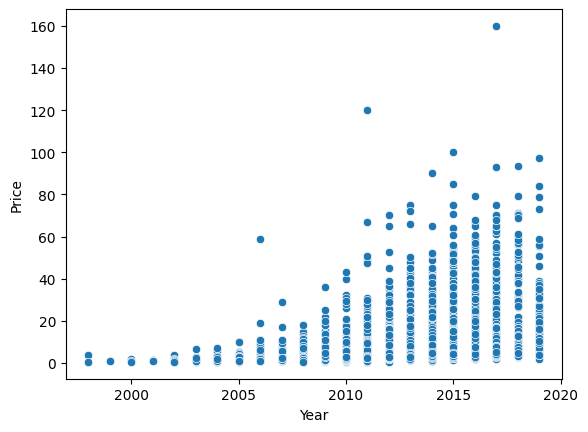

In [ ]:
# prompt: show relationship between year and price scatter plot

sns.scatterplot(x='Year',y='Price',data=df)


In [ ]:
df.nunique()

Year                   22
Kilometers_Driven    3038
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage(kmpl)         439
Engine(cc)            139
Power(bhp)            368
Seats                   8
Price                1364
Brand                  30
Model                 203
Region                  4
dtype: int64

In [ ]:
df.groupby("Owner_Type")["Price"].mean()

Owner_Type
First             10.051087
Fourth & Above     3.567143
Second             7.780303
Third              5.299505
Name: Price, dtype: float64

<ipython-input-47-ce59d2d94a36>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df.groupby('Fuel_Type').sum().index


<BarContainer object of 4 artists>

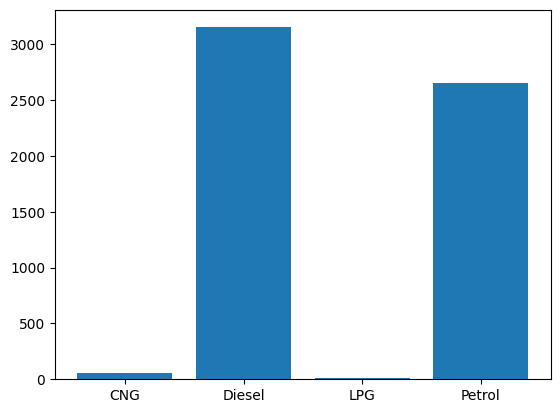

In [ ]:
x = df.groupby('Fuel_Type').sum().index
y = df.groupby('Fuel_Type')['Price'].count()
plt.bar(x,y)

In [ ]:
# prompt: count no. of records with fuel type ='LPG

df['Fuel_Type'].value_counts()


Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [ ]:
df['Model'].value_counts()

Swift         327
City          265
i20           247
Verna         170
Innova        164
             ... 
Evalia          1
Tiguan          1
Countryman      1
Beetle          1
F               1
Name: Model, Length: 203, dtype: int64

In [ ]:
xdf = df.groupby('Brand').agg({'Price': 'mean'})
ydf = df.groupby('Brand')['Price'].mean().index

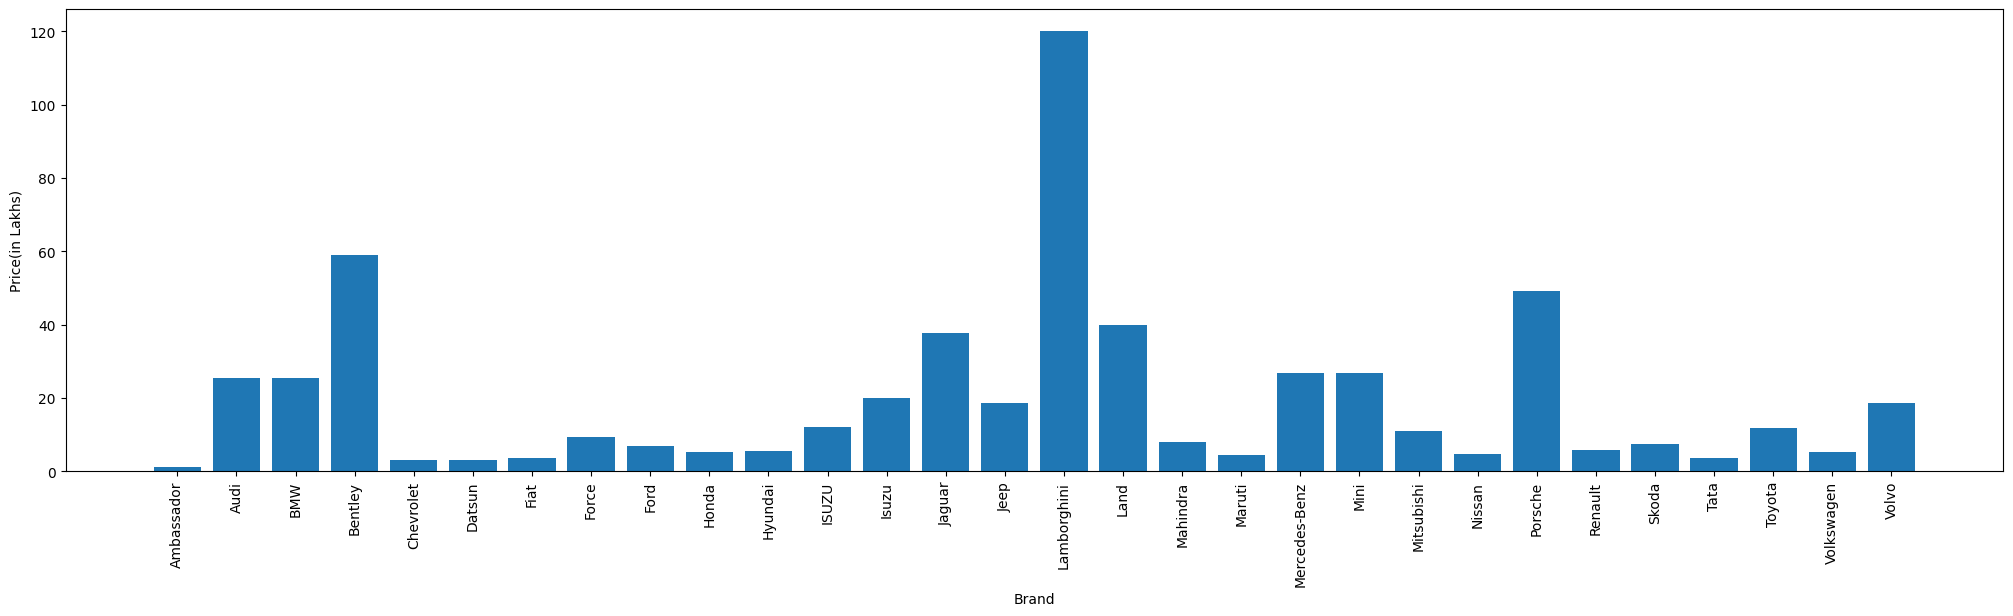

In [ ]:
prod = [prod for prod, df in df.groupby('Brand')]
plt.figure(figsize=(25, 6))
plt.bar(ydf, xdf['Price']) ##
plt.xticks(prod, rotation='vertical')
plt.xlabel("Brand")
plt.ylabel("Price(in Lakhs)")
plt.show()

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
X = df.drop(columns=['Price'],axis=1)

In [ ]:
y = df['Price']

In [ ]:
X.nunique()

Year                   22
Kilometers_Driven    3038
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage(kmpl)         439
Engine(cc)            139
Power(bhp)            368
Seats                   8
Brand                  30
Model                 203
Region                  4
dtype: int64

In [ ]:
# prompt: sort these Brands in increasing order of price

df.groupby('Brand')['Price'].mean().sort_values().index


Index(['Ambassador', 'Datsun', 'Chevrolet', 'Fiat', 'Tata', 'Maruti', 'Nissan',
       'Volkswagen', 'Honda', 'Hyundai', 'Renault', 'Ford', 'Skoda',
       'Mahindra', 'Force', 'Mitsubishi', 'Toyota', 'ISUZU', 'Jeep', 'Volvo',
       'Isuzu', 'BMW', 'Audi', 'Mini', 'Mercedes-Benz', 'Jaguar', 'Land',
       'Porsche', 'Bentley', 'Lamborghini'],
      dtype='object', name='Brand')

In [ ]:
df.groupby('Model')['Brand']


In [ ]:
df['Brand'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

In [ ]:
X.shape

(5872, 12)

In [ ]:
num_features,cat_features

(Index(['Year', 'Kilometers_Driven', 'Mileage(kmpl)', 'Engine(cc)',
        'Power(bhp)', 'Seats'],
       dtype='object'),
 Index(['Region'], dtype='object'))

In [ ]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage(kmpl)', 'Engine(cc)', 'Power(bhp)', 'Seats', 'Brand', 'Model',
       'Region'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# prompt: select Owner_Type, Transmission, Fuel_Type, Brand', Model from X

X[['Owner_Type', 'Transmission', 'Fuel_Type', 'Brand', 'Model']].columns

Index(['Owner_Type', 'Transmission', 'Fuel_Type', 'Brand', 'Model'], dtype='object')

In [ ]:
num_features = X.select_dtypes(exclude="object").columns
cat_features=X[['Region']].columns
c=X[['Fuel_Type', 'Transmission','Owner_Type']].columns
l=X[['Brand', 'Model']].columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
oe=OrdinalEncoder(categories=[['LPG','CNG','Petrol','Diesel'],['Manual','Automatic'],['Fourth & Above','Third','Second','First']])
le = OrdinalEncoder()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("OrdinalEncoder",oe,c),
        ("OrdinalEncoderauto",le,l),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
X= preprocessor.fit_transform(X)

In [ ]:
X.shape

(5872, 15)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((4697, 15), (1175, 15))

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6.2331
- Mean Absolute Error: 3.8110
- R2 Score: 0.7054
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.8762
- Mean Absolute Error: 3.7004
- R2 Score: 0.6709


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6024
- Mean Absolute Error: 3.7331
- R2 Score: 0.6695
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0474
- Mean Absolute Error: 3.4901
- R2 Score: 0.6514


Ridge
Model performance for Training set
- Root Mean Squared Error: 6.2331
- Mean Absolute Error: 3.8107
- R2 Score: 0.7054
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.8761
- Mean Absolute Error: 3.7000
- R2 Score: 0.6709


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.6059
- Mean Absolute Error: 1.3940
- R2 Score: 0.9014
-----------------------